656


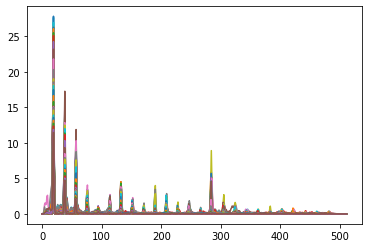

In [3]:
from numpy.fft import fft
import librosa
import math
import matplotlib.pyplot as plt
import numpy as np

# initial values
SR = 8000 # DON'T CHANGE
N = 1024 # DON'T CHANGE
hop = int(N/2) # DON'T CHANGE
file_path = "dguitarLong.wav"
samples, sr = librosa.load(file_path, sr = SR)

totalHarmonics = []

# finds STFT for each frame of audio file
for x in range(0, int(len(samples) / 1024) - 1):
    realSamples = samples[1026 * x : 1026 * (x + 1)]
    # Calculate STFT
    T = math.floor( (len(realSamples)-N) / hop ) + 1 # the total number of frames
    STFT = np.zeros((N, T), dtype='complex') # the STFT result is a N by T matrix
    hann = 0.5 * ( 1 - np.cos(2*np.pi*np.arange(N)/N) ) # Hann window
    for t in range(T): # for each frame
        chunck = realSamples[t*hop : t*hop + N] # get the frame t of audio data
        X = fft(chunck * hann) # apply FFT on windowed signal (the result contains N complex numbers)
        STFT[:, t] = X
    spect = np.abs(STFT[:int(N/2), :]) # complex numbers --> abs values
    plt.plot(spect[:,0])
    totalHarmonics.append(spect[:,0])

In [4]:
# Find the midi note
# Convert that to freqeuncy f(Hz)
# k = f * N / sr to find frequency bin
# Find highest value in range of 1 higher to 1 lower frequency bin
# Double f value and recalculate k using new f
freq = 146.83
sr = 8000
N = 1024
actualK = (freq * N) / sr
nums = np.array(spect[:,0])
harmonics = []
realHarmonics = []

# finds first 5 harmonic ratios for each frame
for spectro in totalHarmonics:
    harmonics = []
    nums = np.array(spectro)
    for i in range(1,6):
        actualK = (i * freq * N) / sr
        val = int(actualK)
        harmonics.append(max(nums[val-10:val+10]))

    sum = 0
    for harmonic in harmonics:
        sum = sum + harmonic

    ratios = []
    for harmonic in harmonics:
        ratios.append(harmonic/sum)

    realHarmonics.append(ratios)

In [5]:
import csv

# write harmonic data to a csv
with open("dGuitarLong.csv","w+") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(realHarmonics)